### Importación de datos



In [59]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [60]:
#Agrupando los datos de cada tienda en un solo dataframe Tienda
tienda["Tienda"]="Tienda 1"
tienda2["Tienda"]="Tienda 2"
tienda3["Tienda"]="Tienda 3"
tienda4["Tienda"]="Tienda 4"
Tiendas=pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
Tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [62]:
#Suma de ingresos(Precio) por cada tienda
Ingresos=Tiendas.groupby("Tienda")["Precio"].sum()
Ingresos

,Precio
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


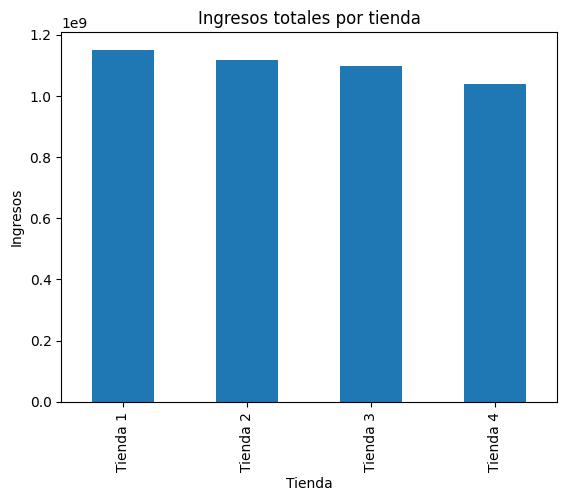

In [64]:
#grafico
import matplotlib.pyplot as plt
Ingresos.plot(kind="bar")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos")
plt.show()

# 2. Ventas por categoría

In [66]:
#cantidad de productos vendidos(Fecha de Compra) por categoria(Categoría del Producto) para cada Tienda
cantidad_ventas_categoria=Tiendas.groupby(["Tienda", "Categoría del Producto"])["Fecha de Compra"].count()
cantidad_ventas_categoria

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar    171
          Deportes y diversión       284
          Electrodomésticos          312
          Electrónicos               448
          Instrumentos musicales     182
          Juguetes                   324
          Libros                     173
          Muebles                    465
Tienda 2  Artículos para el hogar    181
          Deportes y diversión       275
          Electrodomésticos          305
          Electrónicos               422
          Instrumentos musicales     224
          Juguetes                   313
          Libros                     197
          Muebles                    442
Tienda 3  Artículos para el hogar    177
          Deportes y diversión       277
          Electrodomésticos          278
          Electrónicos               451
          Instrumentos musicales     177
          Juguetes                   315
          Libros                     185
          Muebles                    499
Tienda 4  Artículos para el hogar    201
          Deportes y diversión       277
          Electrodomésticos          254
          Electrónicos               451
          Instrumentos musicales     170
          Juguetes                   338
          Libros                     187
          Muebles                    480
Name: Fecha de Compra, dtype: int64

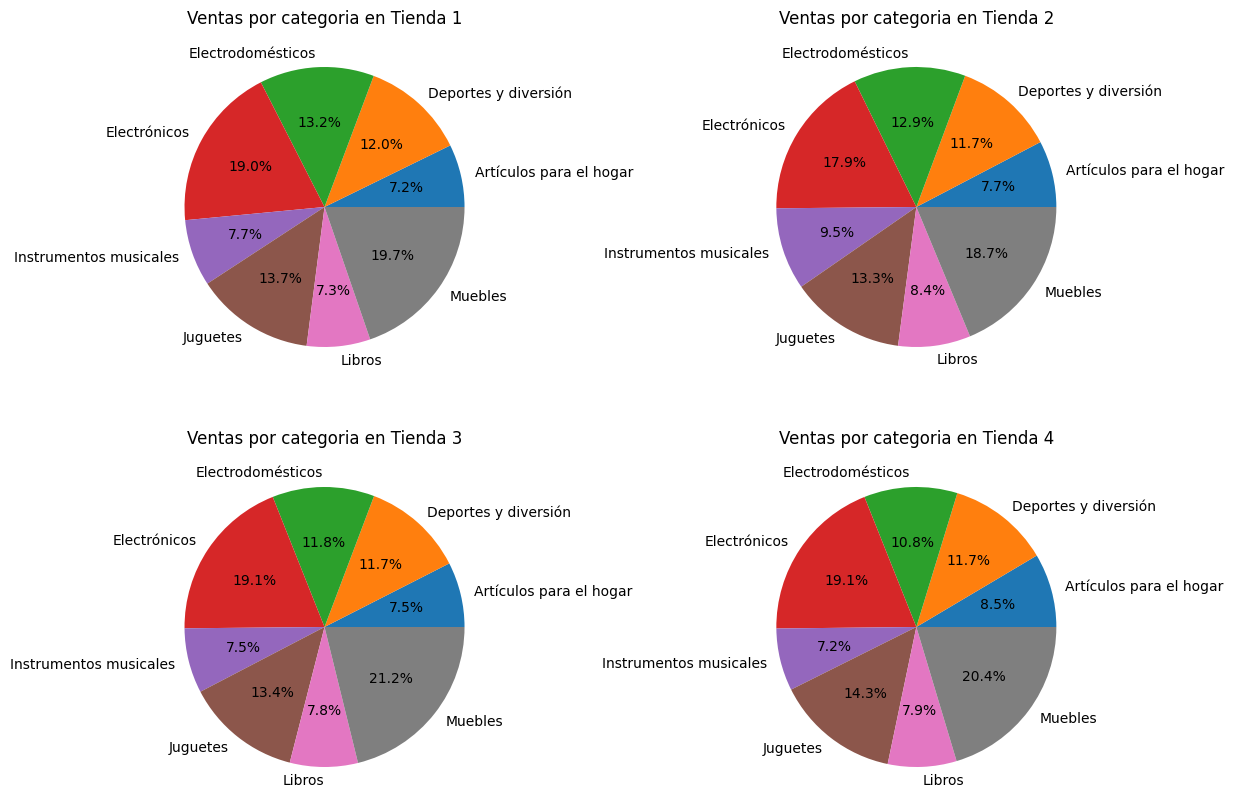

In [99]:
#grafico
df=cantidad_ventas_categoria.reset_index()
lista_tiendas=df["Tienda"].unique()
fig, ax=plt.subplots(2,2, figsize=(14,10))
ax=ax.flatten()
#lazo for para generar cuatros graficos, uno para cada tienda
for i, tienda in enumerate(lista_tiendas):
  datos_tienda=df[df["Tienda"]==tienda]
  ax[i].pie(datos_tienda["Fecha de Compra"], labels=datos_tienda["Categoría del Producto"],autopct='%1.1f%%')
  ax[i].set_title(f"Ventas por categoria en {tienda}")
plt.show()


# 3. Calificación promedio de la tienda


In [101]:
#Calificacion promedio(Calificación) por cada tienda
calificacion_prom=Tiendas.groupby("Tienda")["Calificación"].mean().round(3)
calificacion_prom

,Calificación
Tienda,
Tienda 1,3.977
Tienda 2,4.037
Tienda 3,4.048
Tienda 4,3.996


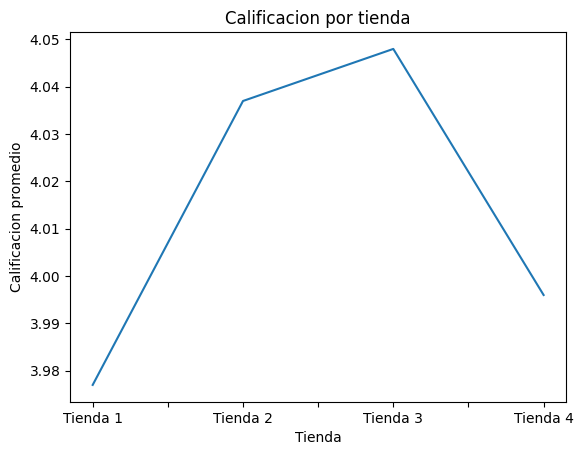

In [104]:
calificacion_prom.plot(kind="line")
plt.title("Calificacion por tienda")
plt.ylabel("Calificacion promedio")
plt.show()

# 4. Productos más y menos vendidos

In [117]:
#productos mas vendidos por tienda
Productos_vendidos=Tiendas.groupby(["Tienda","Producto"])["Fecha de Compra"].count()
top_productos= Productos_vendidos.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
productos_menos_top = Productos_vendidos.groupby(level=0).nsmallest(5).reset_index(level=0, drop=True)
top_productos

Tienda    Producto                 
Tienda 1  Armario                      60
          Microondas                   60
          TV LED UHD 4K                60
          Secadora de ropa             58
          Bloques de construcción      56
Tienda 2  Iniciando en programación    65
          Microondas                   62
          Batería                      61
          Guitarra acústica            58
          Pandereta                    58
Tienda 3  Kit de bancas                57
          Cama king                    56
          Mesa de comedor              56
          Mesa de noche                55
          Set de ollas                 55
Tienda 4  Cama box                     62
          Cubertería                   59
          Cama king                    56
          Dashboards con Power BI      56
          Carrito de control remoto    55
Name: Fecha de Compra, dtype: int64

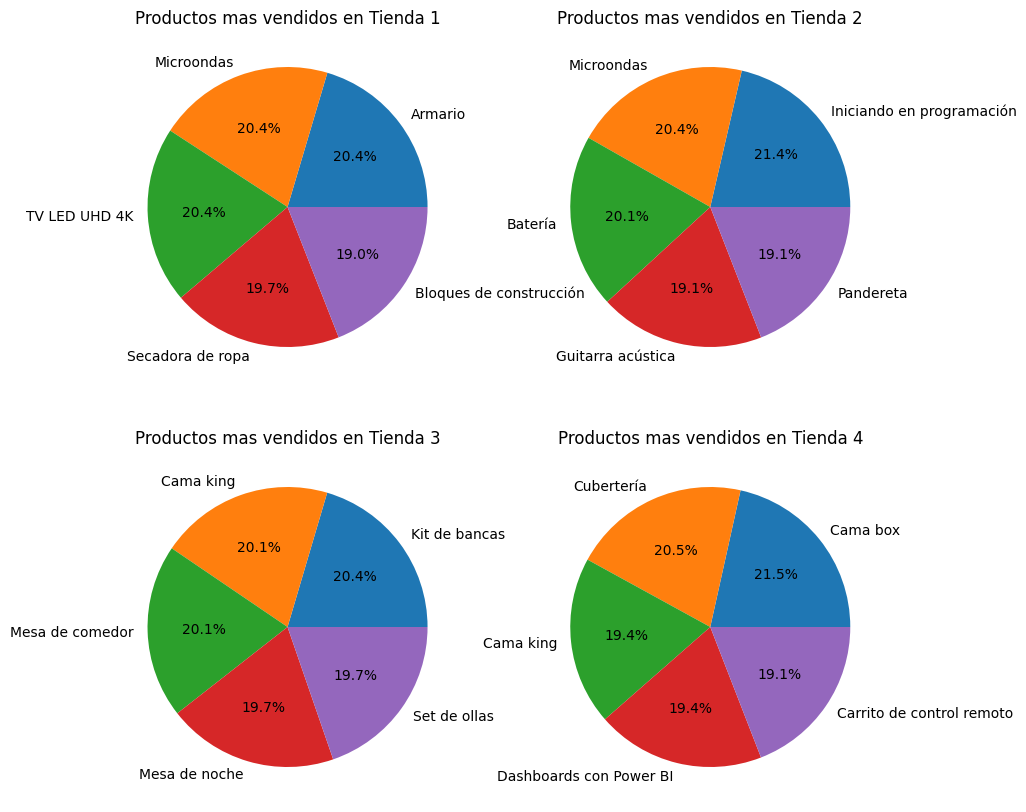

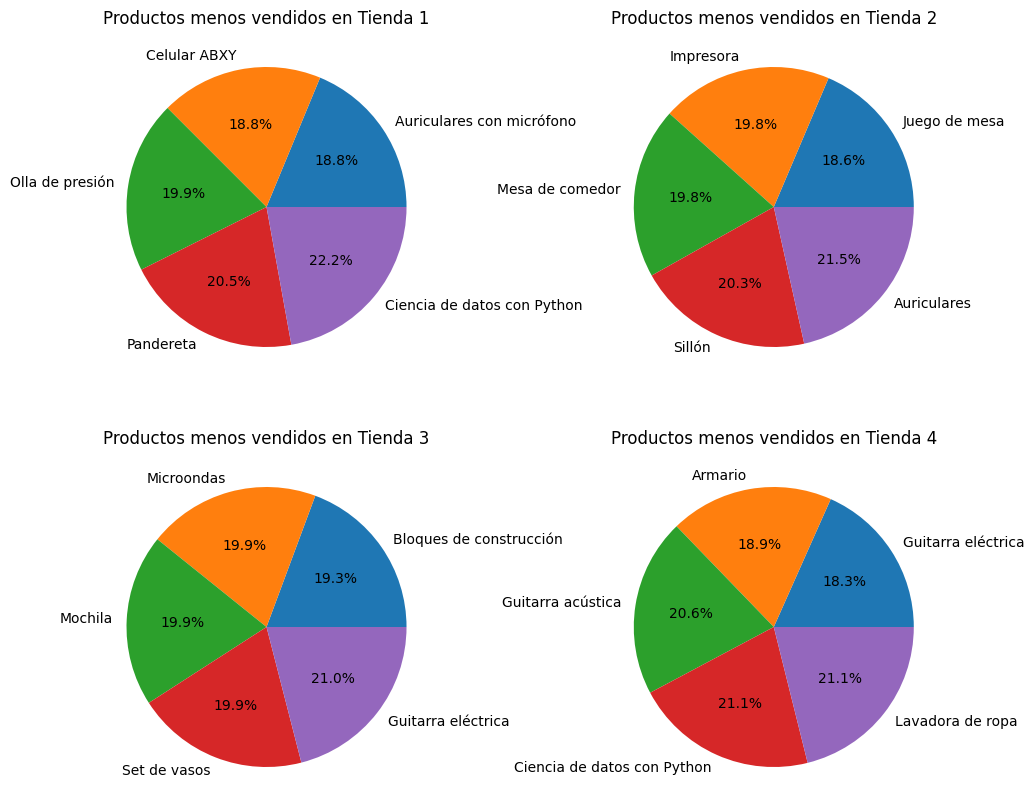

In [121]:
#GRAFICO DE 5 PRODUCTOS MAS VENDIDOS
df=top_productos.reset_index()
lista_tiendas=df["Tienda"].unique()
fig, ax=plt.subplots(2,2, figsize=(10,10))
ax=ax.flatten()
#lazo for para generar cuatros graficos, uno para cada tienda
for i, tienda in enumerate(lista_tiendas):
  datos_tienda=df[df["Tienda"]==tienda]
  ax[i].pie(datos_tienda["Fecha de Compra"], labels=datos_tienda["Producto"],autopct='%1.1f%%')
  ax[i].set_title(f"Productos mas vendidos en {tienda}")
plt.show()

#GRAFICO DE 5 PRODUCTOS MENOS VENDIDOS
df=productos_menos_top.reset_index()
fig, ax=plt.subplots(2,2, figsize=(12,10))
ax=ax.flatten()
#lazo for para generar cuatros graficos, uno para cada tienda
for i, tienda in enumerate(lista_tiendas):
  datos_tienda=df[df["Tienda"]==tienda]
  ax[i].pie(datos_tienda["Fecha de Compra"], labels=datos_tienda["Producto"],autopct='%1.1f%%')
  ax[i].set_title(f"Productos menos vendidos en {tienda}")
plt.show()

# 5. Envío promedio por tienda

In [122]:
#costo de envio promedio por cada tienda
Costo_envio=Tiendas.groupby("Tienda")["Costo de envío"].mean().round(1)
Costo_envio

,Costo de envío
Tienda,
Tienda 1,26018.6
Tienda 2,25216.2
Tienda 3,24805.7
Tienda 4,23459.5


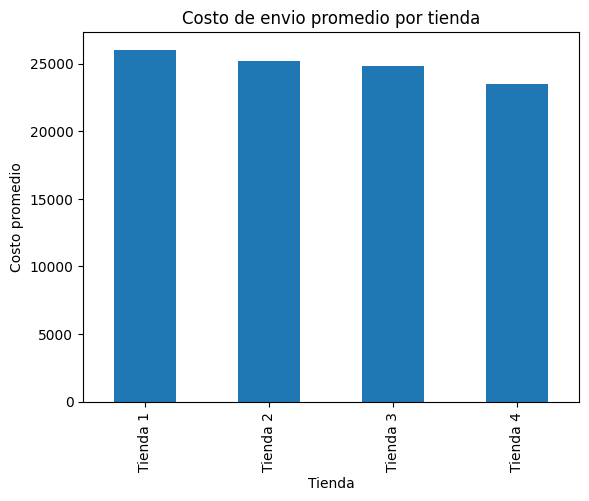

In [123]:
Costo_envio.plot(kind="bar")
plt.title("Costo de envio promedio por tienda")
plt.ylabel("Costo promedio")
plt.show()

#Desicion de venta


In [ ]:
#La Tienda 4 presenta un menor ingreso total y la Tienda 1 presenta el mayor ingreso total.
#Las Tiendas 1 (mas pequeña) y 4 presentan menor calificacion y las Tiendas 2 y 3 presentan mayor calificacion.
#La Tienda 1 vende mas muebles, electrónicos, juguetes, electrodomésticos y deportes-diversion. La Tienda 4 vende mas muebles, electrónicos, juguetes, deportes-diversion y electrodomésticos.
#En Tienda 1, se venden mas microondas, TV LED, armario, secadora de ropa y Bloques de construcción. Y se venden menos celular ABXY, auriculares con microfono, olla de presión, pandereta y ciencia de datos con Python.
#En Tienda 4, se venden mas Cama box, Dashboards, Cama King y carrito de control remoto. Y se venden menos guitarra eléctrica, armario, guitarra acústica, lavadora de ropa y ciencia de datos con Python.
#El costo de envió promedio es menor en la tienda 4 y es mayor en la tienda 1.

**Se vende la Tienda 4**